In [ ]:
################### INFORMAÇÕES DO BANCO DE DADOS RMARKDOWN

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
path = r'C:\Users\Felipe\Desktop\Student Performance\student-mat.csv'
db = pd.read_csv(path, sep = ';')
db.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [28]:
dataset = db[[ 'sex','age','address', 'Mjob', 'Fjob', 'studytime', 'famsup','activities',
            'higher', 'internet', 'freetime', 'health', 'absences', 'G1', 'G2', 'G3']]
dataset.head()

,sex,age,address,Mjob,Fjob,studytime,famsup,activities,higher,internet,freetime,health,absences,G1,G2,G3
0,F,18,U,at_home,teacher,2,no,no,yes,no,3,3,6,5,6,6
1,F,17,U,at_home,other,2,yes,no,yes,yes,3,3,4,5,5,6
2,F,15,U,at_home,other,2,no,no,yes,yes,3,3,10,7,8,10
3,F,15,U,health,services,3,yes,yes,yes,yes,2,5,2,15,14,15
4,F,16,U,other,other,2,yes,no,yes,no,3,5,4,6,10,10


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   address     395 non-null    object
 3   Mjob        395 non-null    object
 4   Fjob        395 non-null    object
 5   studytime   395 non-null    int64 
 6   famsup      395 non-null    object
 7   activities  395 non-null    object
 8   higher      395 non-null    object
 9   internet    395 non-null    object
 10  freetime    395 non-null    int64 
 11  health      395 non-null    int64 
 12  absences    395 non-null    int64 
 13  G1          395 non-null    int64 
 14  G2          395 non-null    int64 
 15  G3          395 non-null    int64 
dtypes: int64(8), object(8)
memory usage: 49.5+ KB


In [30]:
features = ['sex','studytime','famsup','higher','freetime','internet']
for i in features:
    print(f'Quantidade de valores por agrupamento na feature {i}:\n',pd.DataFrame(dataset[i].value_counts(ascending = True)))
    

Quantidade de valores por agrupamento na feature sex:
    sex
M  187
F  208
Quantidade de valores por agrupamento na feature studytime:
    studytime
4         27
3         65
1        105
2        198
Quantidade de valores por agrupamento na feature famsup:
      famsup
no      153
yes     242
Quantidade de valores por agrupamento na feature higher:
      higher
no       20
yes     375
Quantidade de valores por agrupamento na feature freetime:
    freetime
1        19
5        40
2        64
4       115
3       157
Quantidade de valores por agrupamento na feature internet:
      internet
no         66
yes       329


In [31]:
############DESCRIÇÃO DAS HIPOTESES MARKDOWN SOBRE A FEATURE SELECTION E MANIPULAÇÃO DAS FEATURES/TARGET

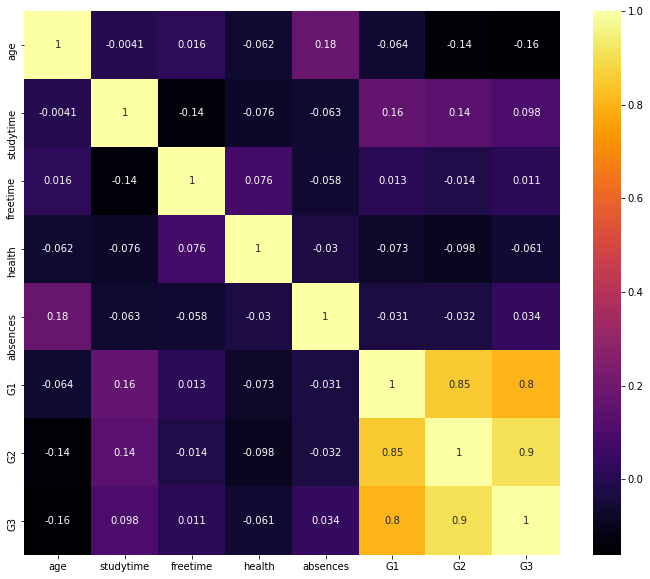

In [32]:
plt.figure(figsize = (12,10))
cor = dataset.corr()
sns.heatmap(cor, annot = True, cmap='inferno')
plt.show()

In [35]:
dataset['G3'].replace([1,2,3,4,5,6,7,8,9], 0, inplace = True)
dataset['G3'].replace([10,11,12,13,14,15,16,17,18,19,20], 1, inplace = True)
dataset['G3'].head

C:\Users\Felipe\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


<bound method NDFrame.head of 0      0
1      0
2      1
3      1
4      1
      ..
390    0
391    1
392    0
393    1
394    0
Name: G3, Length: 395, dtype: int64>

In [ ]:
###### RMARKDOWN DO DECISION TREE